# **Solutions to Exercises, Lab 3**

by Ding

**Exercise**

Try to use this notebook to build model for Fashion-MNIST dataset.

Solution

Import the libraries and define the utility functions, using the same code.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

We will be using the Fashion-MNIST dataset, which is also built into Keras.

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

By the way, you may check an image. Let's look at the 1st, 101st, 201st and 301st images.

<Figure size 432x288 with 0 Axes>

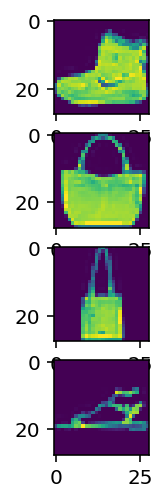

In [ ]:
plt.figure()
f, axarr = plt.subplots(4, 1) 
for i in range(4):
  axarr[i].imshow(x_train[i * 100])

Use the same code from the lab intruction.

In [ ]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels  54000 traning 6000 validation 10000 testing
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("Training response shape:, ", y_train.shape)
print("Testing response shape: ", y_test.shape)

image_size = (x_train.shape[1], x_train.shape[2])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training response shape:,  (60000,)
Testing response shape:  (10000,)


In [ ]:
# Flatten the images
image_vector_size = image_size[0] * image_size[1] # 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.
print(x_train.shape)

print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])
print(y_train.shape)

(60000, 784)
First 5 training labels:  [9 0 0 3 0]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


In this example, I want to build a model with 2 hidden layers, 4 neurons in the first layer and 8 neurons in the second layer (umm.. not very good), using the relu and sigmoid activation functions. I also add a drop out layer.

In [ ]:
def build_basic_model():
  model = Sequential()
  model.add(Dense(units=4, activation='relu', input_shape=(image_vector_size,)))
  model.add(Dense(units=8, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model
model = build_basic_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                90        
Total params: 3,270
Trainable params: 3,270
Non-trainable params: 0
_________________________________________________________________


I chose the Adam (Adaptive Moment Estimation) optimizer with a learning rate of 0.05. You may use the following dictionary to choose an optimzer.

In [ ]:
opt_dict = {'nadam':Nadam,
            'adam':Adam,
            'sgd':SGD,
            'rmsprop':RMSprop,
            'adadelta':Adadelta,
            'adagrad':Adagrad}

In [ ]:
model.compile(Adam(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

I use a batch size of 256 and train the model for 10 epoches only.

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/10
211/211 [==============================] - 1s 4ms/step - loss: 1.7360 - accuracy: 0.2727 - val_loss: 1.2782 - val_accuracy: 0.4443
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 1.3181 - accuracy: 0.4415 - val_loss: 1.1522 - val_accuracy: 0.5253
Epoch 3/10
211/211 [==============================] - 1s 3ms/step - loss: 1.2528 - accuracy: 0.4794 - val_loss: 1.0623 - val_accuracy: 0.5703
Epoch 4/10
211/211 [==============================] - 1s 3ms/step - loss: 1.1932 - accuracy: 0.5153 - val_loss: 1.0560 - val_accuracy: 0.5928
Epoch 5/10
211/211 [==============================] - 1s 3ms/step - loss: 1.1707 - accuracy: 0.5227 - val_loss: 1.0311 - val_accuracy: 0.6140
Epoch 6/10
211/211 [==============================] - 1s 4ms/step - loss: 1.1739 - accuracy: 0.5275 - val_loss: 1.0595 - val_accuracy: 0.5798
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 1.1828 - accuracy: 0.5186 - val_loss: 1.0728 - val_accuracy: 0.5827
Epoch 

Ooops, I got a validation accuracy of 57.65%. Will you get a better validation accuracy by changing some of these settings and paramters?

(End)